FB-22 Venher Pavlo Lab 6

Imports

In [103]:
import numpy as np
import matplotlib.pyplot as plt

Task 1

1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу результатів.

In [104]:
k = 10 
b = 4
n = 500

x = np.linspace(0, 10, n)
error = np.random.normal(0, 10, n)

y = k * x + b + error

# print(y)
# print(type(x))

2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.

In [105]:
def use_least_squares_method(x, y):
    x_mean = x.mean()
    y_mean = y.mean()

    b1 = ((x - x_mean) * (y - y_mean)).sum()/((x - x_mean) ** 2).sum()
    b0 = y_mean - b1 * x_mean

    return b1, b0

optimal_k, optimal_b = use_least_squares_method(x, y)

print("optimal k:", optimal_k)
print("optimal b:", optimal_b)

optimal k: 9.966105735169101
optimal b: 5.26697286414521


3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [106]:
polyfit_params = np.polyfit(x, y, 1)

print("evaluation:", polyfit_params)

evaluation: [9.96610574 5.26697286]


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

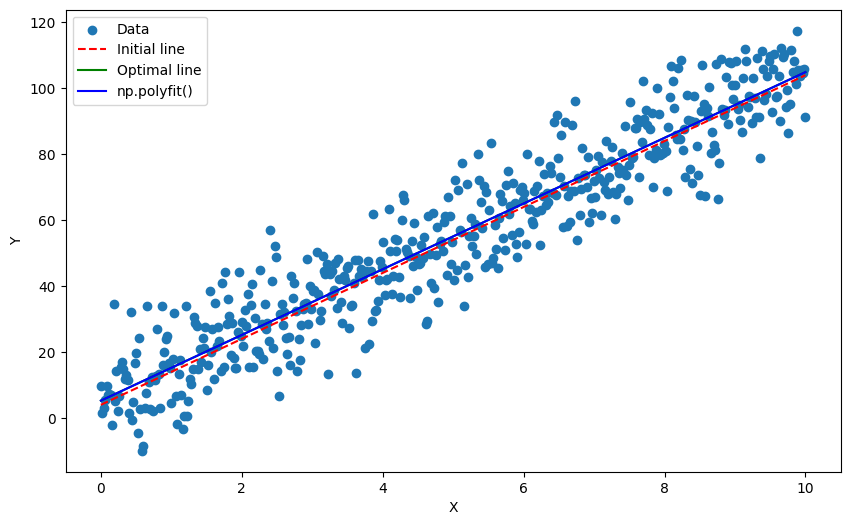

In [107]:
optimal_y = optimal_k * x + optimal_b
polyfit_y = polyfit_params[0] * x + polyfit_params[1]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')

plt.plot(x, k * x + b, color='red', linestyle='--', label='Initial line')
plt.plot(x, optimal_y, color='green', label='Optimal line')
plt.plot(x, polyfit_y, color='blue', label='np.polyfit()')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Task 2

1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [108]:
def gradient_descent(x, y, k, b, learning_rate, n_iter):
    for i in range(n_iter):
        k_gradient = -(2/n) * (x * (y - (k*x + b))).sum()
        b_gradient = -(2/n) * (y - (k*x + b)).sum()
        
        k -= learning_rate * k_gradient
        b -= learning_rate * b_gradient
        
    return k, b

n_iter = 1000
learning_rate = 0.01

descent_k, descent_b = gradient_descent(x, y, k, b, learning_rate, n_iter)
print("descent k):", descent_k)
print("descent b:", descent_b)

descent k): 9.967481478749558
descent b: 5.2578595178207905


2. Додайте отриману лінію регресії на загальний графік

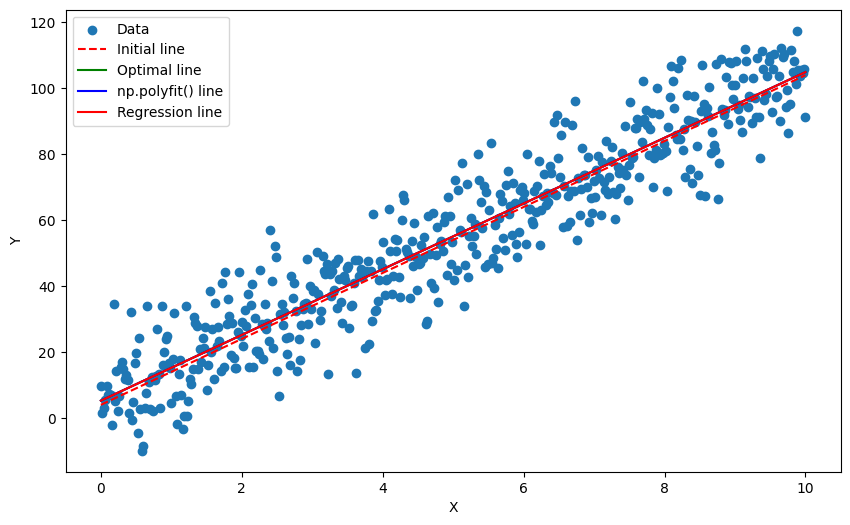

In [109]:
optimal_y = optimal_k * x + optimal_b
polyfit_y = polyfit_params[0] * x + polyfit_params[1]
regression_y = descent_k * x + descent_b

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')

plt.plot(x, k * x + b, color='red', linestyle='--', label='Initial line')
plt.plot(x, optimal_y, color='green', label='Optimal line')
plt.plot(x, polyfit_y, color='blue', label='np.polyfit() line')
plt.plot(x, regression_y, color='red', label='Regression line')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

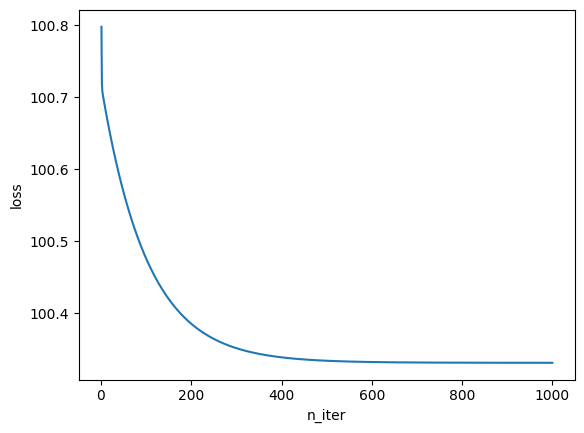

In [110]:
def gradient_descent_loss(x, y, k, b, learning_rate, n_iter):  
    loss_history = []
    
    for i in range(n_iter):
        k_gradient = -(2/n) * (x * (y - (k*x + b))).sum()
        b_gradient = -(2/n) * (y - (k*x + b)).sum()
        
        k -= learning_rate * k_gradient
        b -= learning_rate * b_gradient
        
        loss = np.mean((y - (k*x + b))**2)
        loss_history.append(loss)
        
    return k, b, loss_history

optimal_k, optimal_b, loss_history = gradient_descent_loss(x, y, k, b, learning_rate, n_iter)

plt.plot(np.arange(1, n_iter + 1), loss_history)
plt.xlabel('n_iter')
plt.ylabel('loss')
plt.show()

#### Порівняйте отримані результати з результатами попереднього завдання

In [111]:
estimated_k_polyfit = polyfit_params[0]
estimated_b_polyfit = polyfit_params[1]

# Виведення результатів
print("descent k:", descent_k)
print("descent b:", descent_b)
print("optimal k:", optimal_k)
print("optimal b:", optimal_b)
print("np.polyfit() k:", polyfit_params[0])
print("np.polyfit() b:", polyfit_params[1])

descent k: 9.967481478749558
descent b: 5.2578595178207905
optimal k: 9.967481478749558
optimal b: 5.2578595178207905
np.polyfit() k: 9.9661057351691
np.polyfit() b: 5.266972864145203
